In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，优先使用SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

male = pd.read_excel(r"E:\0workspace\Guosai-2025\filtered-ref.xlsx")
male.drop('染色体的非整倍体',axis=1,inplace=True)
male.dropna(inplace=True)

In [3]:
def show_week(x):
    x = x[0]+x[1]
    x = float(x)
    return x

In [4]:
df = pd.read_excel('filtered-ref.xlsx')
df = df[df['孕妇BMI'] >= 25]
features = df['孕妇BMI']
print (features.head())

scaler = StandardScaler()
bmi_scaled = scaler.fit_transform(df[['孕妇BMI']])
print (bmi_scaled)


0    28.125000
1    28.515625
2    28.906250
3    33.331832
4    34.232692
Name: 孕妇BMI, dtype: float64
[[-1.44646332e+00]
 [-1.31106595e+00]
 [-1.17566858e+00]
 [ 3.58314485e-01]
 [ 6.70568220e-01]
 [ 5.14441353e-01]
 [ 6.70568220e-01]
 [-5.39300959e-01]
 [-5.39300959e-01]
 [-5.39300959e-01]
 [-4.01195645e-01]
 [-1.43940648e-01]
 [-1.26752445e+00]
 [-1.26752445e+00]
 [-1.33694787e+00]
 [-1.08702355e+00]
 [-5.03856939e-01]
 [-3.49804822e-01]
 [-2.62953809e-02]
 [ 1.24281331e+00]
 [ 1.33165536e+00]
 [ 1.36126938e+00]
 [ 5.46261407e-01]
 [ 5.46261407e-01]
 [ 6.76720684e-01]
 [ 6.76720684e-01]
 [ 6.76720684e-01]
 [-1.09592362e+00]
 [-9.51650047e-01]
 [-5.90966116e-01]
 [-3.74555755e-01]
 [ 3.58834907e-01]
 [ 3.58834907e-01]
 [ 6.66939138e-01]
 [ 8.20991255e-01]
 [ 3.58834907e-01]
 [ 3.58834907e-01]
 [ 1.12909549e+00]
 [ 1.12909549e+00]
 [ 1.12909549e+00]
 [ 1.59125183e+00]
 [ 1.59125183e+00]
 [ 1.36996490e+00]
 [ 1.60704111e+00]
 [ 1.60704111e+00]
 [ 1.84411730e+00]
 [-6.63102901e-01]
 [-8

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 假设你的数据已经标准化并存储在 features_scaled 中
# features_scaled = scaler.fit_transform(df[['BMI']])

# 假设你已经运行了K-means，得到了聚类标签
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(bmi_scaled)
cluster_labels = kmeans.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(bmi_scaled, cluster_labels)
print(f"聚类模型的平均轮廓系数为: {silhouette_avg:.4f}")

聚类模型的平均轮廓系数为: 0.5714


K-means聚类得到的 4 组平均BMI分别是: [29.70719715 32.37494674 35.34316898 40.60622975]


C:\Users\锤子\AppData\Local\Temp\ipykernel_27484\863571097.py:62: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  plt.tight_layout()
E:\anacoda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


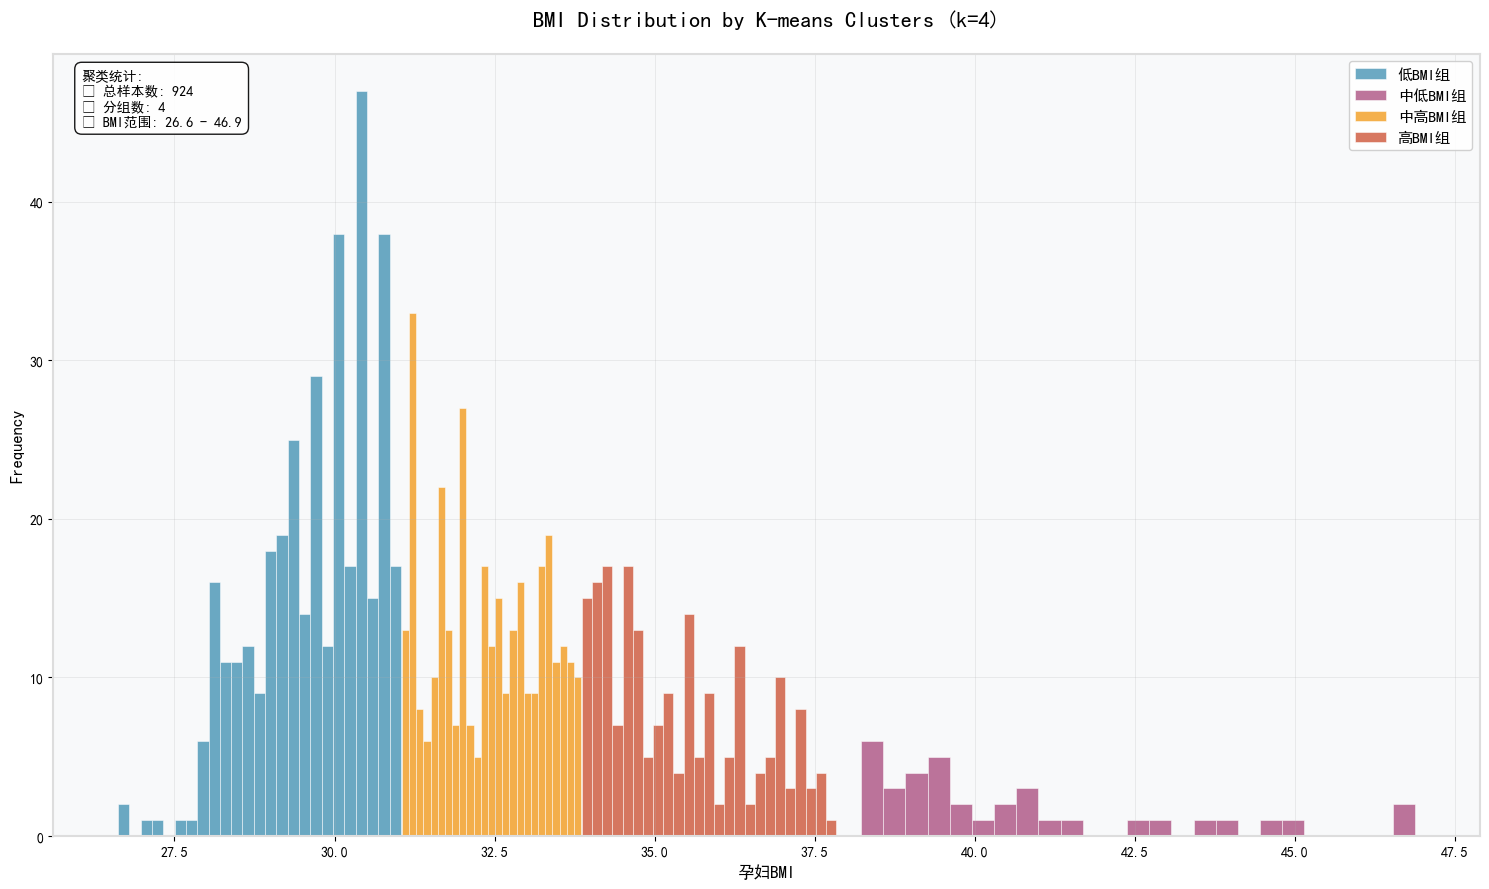


每个K-means组的样本数和平均BMI:
        count  mean_bmi  std_bmi  min_bmi  max_bmi
低BMI组     360     29.71     0.91    26.62    31.04
中低BMI组    331     32.39     0.83    31.05    33.85
中高BMI组    197     35.35     1.11    33.86    37.83
高BMI组      36     40.61     2.39    38.22    46.88

各组占比:
低BMI组: 39.0%
中低BMI组: 35.8%
中高BMI组: 21.3%
高BMI组: 3.9%


In [6]:
# 假设你根据肘部法则或你的研究目的，决定分成4组
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['BMI_Group'] = kmeans.fit_predict(bmi_scaled)

# 获取聚类中心，并转换回原始BMI值
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
sorted_centers = np.sort(cluster_centers.flatten())
print(f"K-means聚类得到的 {n_clusters} 组平均BMI分别是: {sorted_centers}")

# 设置颜色方案（与肘部图保持一致）
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
group_labels = ['低BMI组', '中低BMI组', '中高BMI组', '高BMI组']

# 可视化分组
plt.figure(figsize=(15, 9))
for group_id in range(n_clusters):
    subset = df[df['BMI_Group'] == group_id]
    plt.hist(subset['孕妇BMI'], bins=25, alpha=0.7, 
             label=f'{group_labels[group_id]}', 
             color=colors[group_id], 
             edgecolor='white', linewidth=0.5)

# 美化图表
plt.title(f'BMI Distribution by K-means Clusters (k={n_clusters})', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('孕妇BMI', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# 设置网格和样式
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

# 美化边框
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')

# 添加图例
plt.legend(fontsize=11, framealpha=0.9, fancybox=True)

# 添加平均线标注
"""
for i, center in enumerate(sorted_centers):
    plt.axvline(center, color=colors[i], linestyle='--', alpha=0.8, linewidth=2)
    plt.text(center, plt.ylim()[1]*0.9, f'平均: {center:.1f}', 
             fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
             facecolor="white", alpha=0.8))
"""


# 添加统计信息文本框
stats_text = f"""聚类统计:
• 总样本数: {len(df):,}
• 分组数: {n_clusters}
• BMI范围: {df['孕妇BMI'].min():.1f} - {df['孕妇BMI'].max():.1f}"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9))

plt.tight_layout()
plt.show()

# 查看每个组的样本数和BMI均值
print("\n每个K-means组的样本数和平均BMI:")
grouped_data = df.groupby('BMI_Group')
summary = grouped_data.agg(
    count=('孕妇BMI', 'size'),
    mean_bmi=('孕妇BMI', 'mean'),
    std_bmi=('孕妇BMI', 'std'),
    min_bmi=('孕妇BMI', 'min'),
    max_bmi=('孕妇BMI', 'max')
).sort_values(by='mean_bmi')

# 重命名索引为更有意义的标签
summary.index = group_labels
print(summary.round(2))

# 添加百分比信息
summary['percentage'] = (summary['count'] / len(df) * 100).round(1)
print(f"\n各组占比:")
for group, row in summary.iterrows():
    print(f"{group}: {row['percentage']}%")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你的 df 已经有了 'BMI' 和 'BMI_Group' 两列
# 这里的 BMI_Group 是 KMeans 聚类的结果
"""
# 方法一：箱线图 (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Group', y='孕妇BMI', data=df)
plt.title('BMI Distribution by K-means Cluster')
plt.xlabel('Cluster Group')
plt.ylabel('BMI')
#plt.show()

# 方法二：小提琴图 (Violin Plot)，可以显示更详细的分布
plt.figure(figsize=(10, 6))
sns.violinplot(x='BMI_Group', y='孕妇BMI', data=df)
plt.title('BMI Distribution by K-means Cluster')
plt.xlabel('Cluster Group')
plt.ylabel('BMI')
#plt.show()

"""


"\n# 方法一：箱线图 (Box Plot)\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='BMI_Group', y='孕妇BMI', data=df)\nplt.title('BMI Distribution by K-means Cluster')\nplt.xlabel('Cluster Group')\nplt.ylabel('BMI')\n#plt.show()\n\n# 方法二：小提琴图 (Violin Plot)，可以显示更详细的分布\nplt.figure(figsize=(10, 6))\nsns.violinplot(x='BMI_Group', y='孕妇BMI', data=df)\nplt.title('BMI Distribution by K-means Cluster')\nplt.xlabel('Cluster Group')\nplt.ylabel('BMI')\n#plt.show()\n\n"

CART回归决策树找到的多个BMI分割点是: [30.435519218444824, 36.57244682312012, 43.23984336853027]


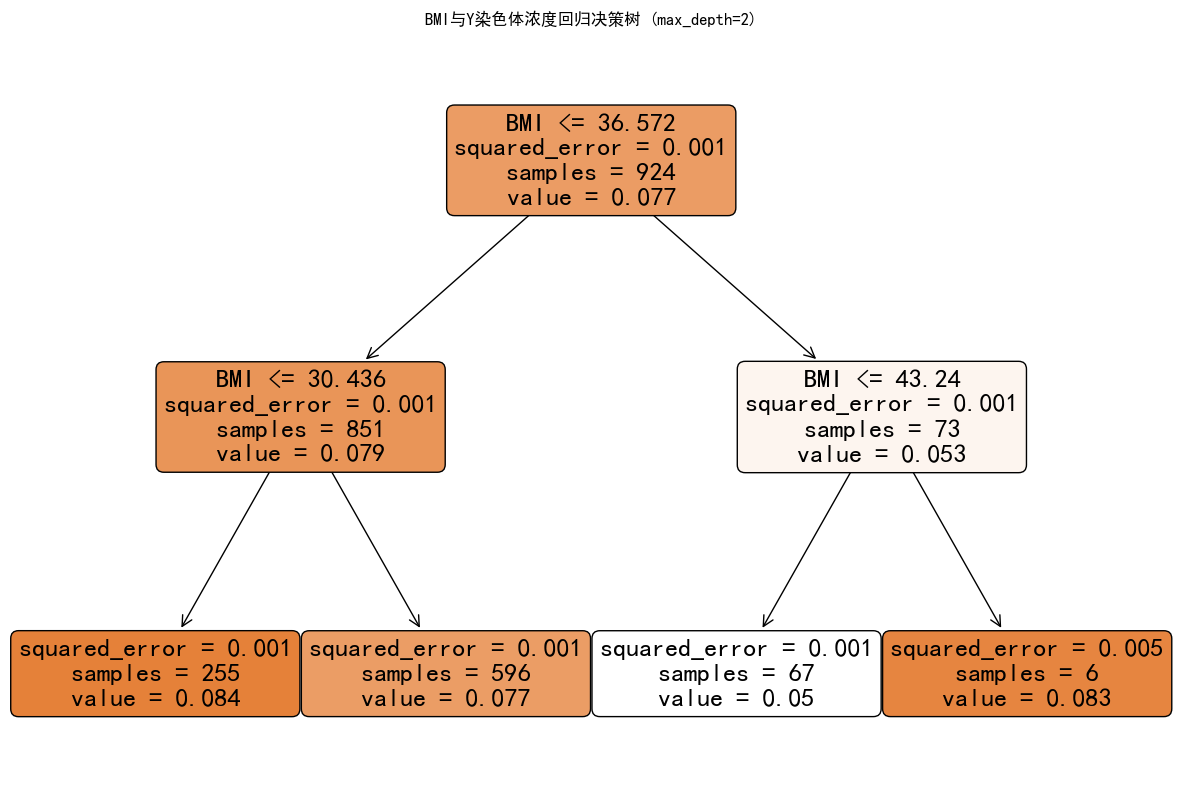


每个CART组的Y染色体浓度均值:
BMI_Group_CART
[-inf, 30.436)      0.084187
[30.436, 36.572)    0.076600
[36.572, 43.24)     0.050270
[43.24, inf)        0.083005
Name: Y染色体浓度, dtype: float64


In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
# 准备数据
X = df[['孕妇BMI']]
y = df['Y染色体浓度']

# 使用回归决策树，设置 max_depth=2 来创建多个分割点
cart_regressor = DecisionTreeRegressor(max_depth=2)
cart_regressor.fit(X, y)

# 获取所有分割点
thresholds = cart_regressor.tree_.threshold
# 过滤掉叶子节点（值为-2）
split_points = sorted([t for t in thresholds if t != -2])

print(f"CART回归决策树找到的多个BMI分割点是: {split_points}")

# 可视化决策树
plt.figure(figsize=(15, 10))
plot_tree(cart_regressor, feature_names=['BMI'], filled=True, rounded=True)
plt.title("BMI与Y染色体浓度回归决策树 (max_depth=2)")
plt.show()

# 根据分割点对数据进行分组
df['BMI_Group_CART'] = pd.cut(df['孕妇BMI'], bins=[-np.inf] + split_points + [np.inf], right=False)

# 查看每个组的Y染色体浓度均值
print("\n每个CART组的Y染色体浓度均值:")
print(df.groupby('BMI_Group_CART')['Y染色体浓度'].mean())

k=4各组的平均BMI和原始标签:

将合并中间两组: 组2 和 组3


IndexError: invalid index to scalar variable.

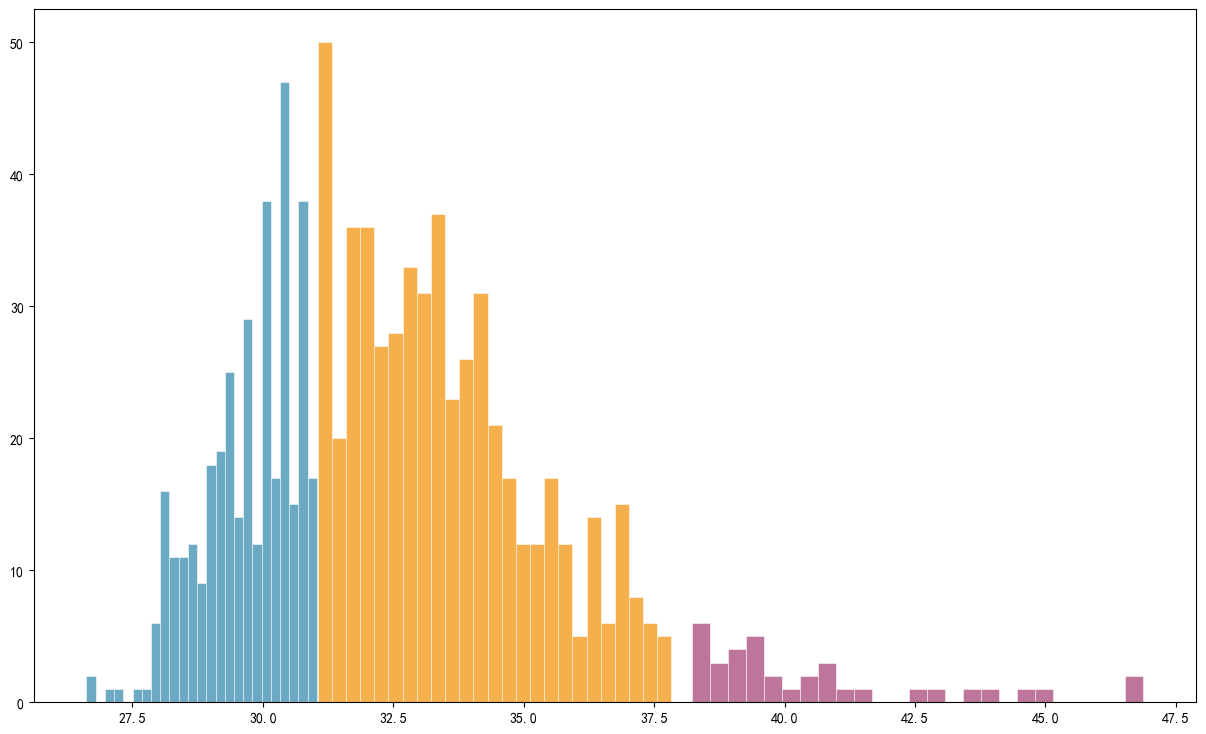

In [10]:
# 使用k=4的聚类结果，但手动合并中间两组
# 首先确保已经运行了k=4的聚类
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# df['BMI_Group'] = kmeans.fit_predict(bmi_scaled)

# 获取k=4的聚类中心并按大小排序
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_with_labels = list(zip(cluster_centers.flatten(), range(4)))
sorted_centers = sorted(centers_with_labels, key=lambda x: x[0])

print("k=4各组的平均BMI和原始标签:")
#for center, original_label in sorted_centers:
#    print(f"组{original_label}: BMI平均值为 {center[0]:.2f}")

# 确定哪个是中间两组（按BMI值排序后的第1和第2组）
middle_groups = [sorted_centers[1][1], sorted_centers[2][1]]  # 中间两组的原始标签
low_group = sorted_centers[0][1]   # 最低BMI组的原始标签
high_group = sorted_centers[3][1]  # 最高BMI组的原始标签

print(f"\n将合并中间两组: 组{middle_groups[0]} 和 组{middle_groups[1]}")

# 手动合并分组
def create_merged_groups(original_group):
    if original_group == low_group:
        return 0  # 低BMI组
    elif original_group in middle_groups:
        return 1  # 合并后的正常BMI组
    else:
        return 2  # 高BMI组

df['BMI_Group_Merged'] = df['BMI_Group'].apply(create_merged_groups)

# 设置更有意义的标签
group_labels = {0: '低BMI组', 1: '正常BMI组', 2: '高BMI组'}
df['BMI_Group_Label'] = df['BMI_Group_Merged'].map(group_labels)

# 可视化合并后的分组
plt.figure(figsize=(15, 9))
colors = ['#2E86AB', '#F18F01', '#A23B72']  # 蓝、橙、粉

for group_id in range(3):
    subset = df[df['BMI_Group_Merged'] == group_id]
    plt.hist(subset['孕妇BMI'], bins=25, alpha=0.7, 
             label=group_labels[group_id], 
             color=colors[group_id], 
             edgecolor='white', linewidth=0.5)

# 添加原k=4的分割线（虚线）
for center, original_label in sorted_centers:
    plt.axvline(center[0], color='gray', linestyle='--', alpha=0.5, linewidth=1)
    plt.text(center[0], plt.ylim()[1]*0.95, f'原分割点\n{center[0]:.1f}', 
             fontsize=8, ha='center', alpha=0.7)

# 美化图表
plt.title('BMI分布 - 基于k=4聚类合并中间两组', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('孕妇BMI', fontsize=12, fontweight='bold')
plt.ylabel('频数', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')

plt.legend(fontsize=11, framealpha=0.9, fancybox=True)

# 添加统计信息
stats_text = f"""分组统计:
• 低BMI组: {len(df[df['BMI_Group_Merged'] == 0]):,} 人
• 正常BMI组: {len(df[df['BMI_Group_Merged'] == 1]):,} 人  
• 高BMI组: {len(df[df['BMI_Group_Merged'] == 2]):,} 人"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9))

plt.tight_layout()
plt.show()

# 查看详细的统计信息
print("\n合并后的分组详细统计:")
summary_merged = df.groupby('BMI_Group_Label').agg(
    count=('孕妇BMI', 'size'),
    percentage=('孕妇BMI', lambda x: f"{len(x)/len(df)*100:.1f}%"),
    mean_bmi=('孕妇BMI', 'mean'),
    std_bmi=('孕妇BMI', 'std'),
    min_bmi=('孕妇BMI', 'min'),
    max_bmi=('孕妇BMI', 'max')
).round(2)

print(summary_merged)

k=4各组的平均BMI和原始标签:
组0: BMI平均值为 29.71
组2: BMI平均值为 32.37
组3: BMI平均值为 35.34
组1: BMI平均值为 40.61

将合并中间两组: 组2 和 组3


C:\Users\锤子\AppData\Local\Temp\ipykernel_27484\3359342766.py:78: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  plt.tight_layout()
E:\anacoda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


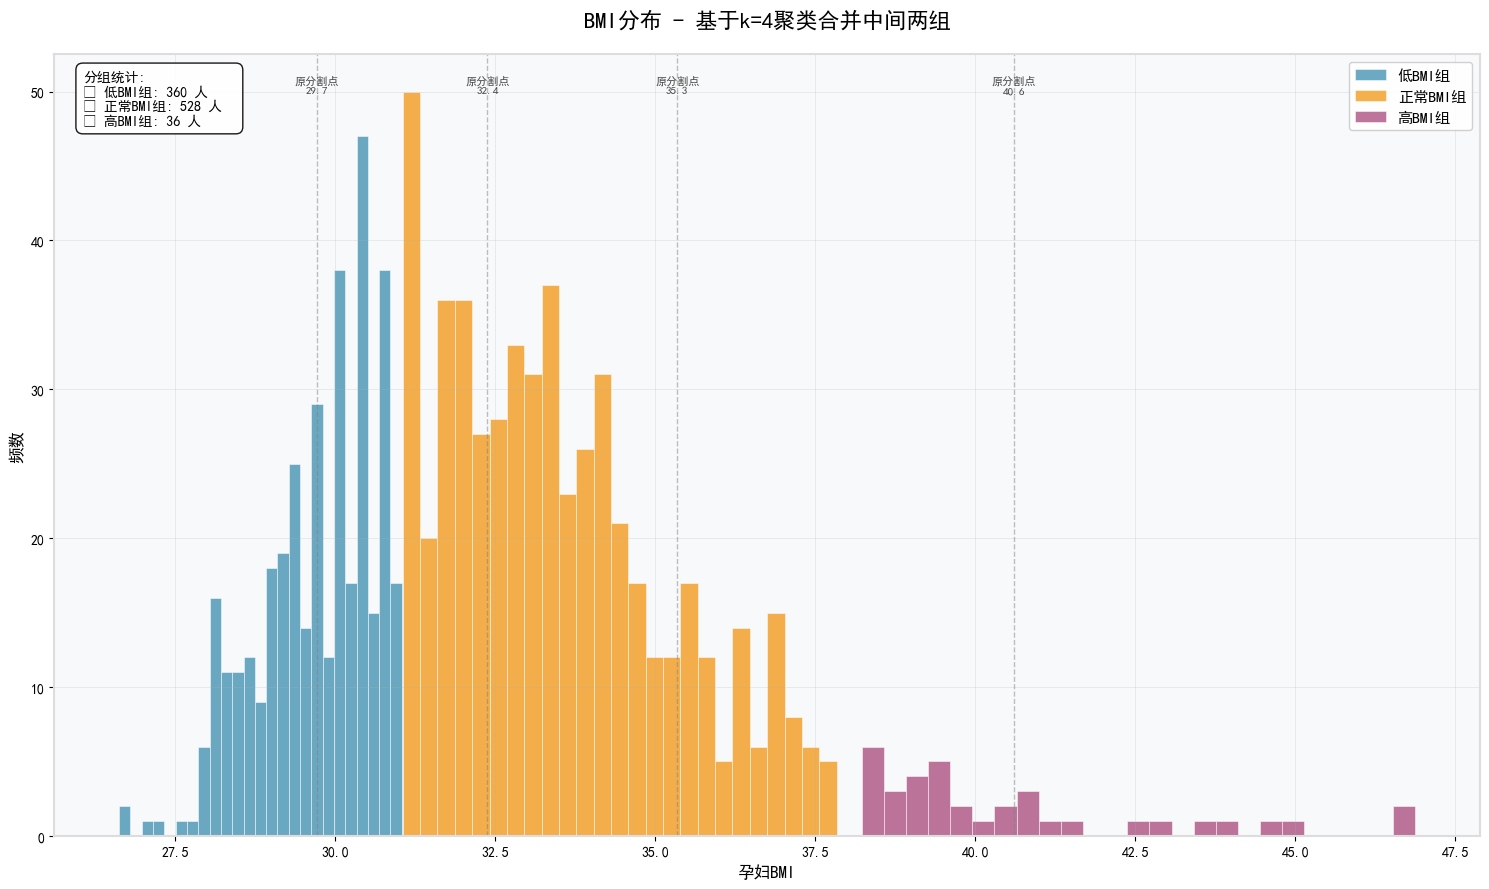


合并后的分组详细统计:
                 count percentage  mean_bmi  std_bmi  min_bmi  max_bmi
BMI_Group_Label                                                       
低BMI组              360      39.0%     29.71     0.91    26.62    31.04
正常BMI组             528      57.1%     33.49     1.72    31.05    37.83
高BMI组               36       3.9%     40.61     2.39    38.22    46.88


In [11]:
# 使用k=4的聚类结果，但手动合并中间两组
# 首先确保已经运行了k=4的聚类
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# df['BMI_Group'] = kmeans.fit_predict(bmi_scaled)

# 获取k=4的聚类中心并按大小排序
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# 将聚类中心从二维数组转换为一维数组
cluster_centers_flat = cluster_centers.flatten()
centers_with_labels = list(zip(cluster_centers_flat, range(4)))
sorted_centers = sorted(centers_with_labels, key=lambda x: x[0])

print("k=4各组的平均BMI和原始标签:")
for center_value, original_label in sorted_centers:
    print(f"组{original_label}: BMI平均值为 {center_value:.2f}")

# 确定哪个是中间两组（按BMI值排序后的第1和第2组）
middle_groups = [sorted_centers[1][1], sorted_centers[2][1]]  # 中间两组的原始标签
low_group = sorted_centers[0][1]   # 最低BMI组的原始标签
high_group = sorted_centers[3][1]  # 最高BMI组的原始标签

print(f"\n将合并中间两组: 组{middle_groups[0]} 和 组{middle_groups[1]}")

# 手动合并分组
def create_merged_groups(original_group):
    if original_group == low_group:
        return 0  # 低BMI组
    elif original_group in middle_groups:
        return 1  # 合并后的正常BMI组
    else:
        return 2  # 高BMI组

df['BMI_Group_Merged'] = df['BMI_Group'].apply(create_merged_groups)

# 设置更有意义的标签
group_labels = {0: '低BMI组', 1: '正常BMI组', 2: '高BMI组'}
df['BMI_Group_Label'] = df['BMI_Group_Merged'].map(group_labels)

# 可视化合并后的分组
plt.figure(figsize=(15, 9))
colors = ['#2E86AB', '#F18F01', '#A23B72']  # 蓝、橙、粉

for group_id in range(3):
    subset = df[df['BMI_Group_Merged'] == group_id]
    plt.hist(subset['孕妇BMI'], bins=25, alpha=0.7, 
             label=group_labels[group_id], 
             color=colors[group_id], 
             edgecolor='white', linewidth=0.5)

# 添加原k=4的分割线（虚线）- 修正这里
for center_value, original_label in sorted_centers:
    plt.axvline(center_value, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    plt.text(center_value, plt.ylim()[1]*0.95, f'分割点\n{center_value:.1f}', 
             fontsize=8, ha='center', alpha=0.7)

# 美化图表
plt.title('BMI分布 - 基于k=4聚类合并中间两组', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('孕妇BMI', fontsize=12, fontweight='bold')
plt.ylabel('频数', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('#F8F9FA')

for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('#DDDDDD')

plt.legend(fontsize=11, framealpha=0.9, fancybox=True)

# 添加统计信息
stats_text = f"""分组统计:
• 低BMI组: {len(df[df['BMI_Group_Merged'] == 0]):,} 人
• 正常BMI组: {len(df[df['BMI_Group_Merged'] == 1]):,} 人  
• 高BMI组: {len(df[df['BMI_Group_Merged'] == 2]):,} 人"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9))

plt.tight_layout()
plt.show()

# 查看详细的统计信息
print("\n合并后的分组详细统计:")
summary_merged = df.groupby('BMI_Group_Label').agg(
    count=('孕妇BMI', 'size'),
    percentage=('孕妇BMI', lambda x: f"{len(x)/len(df)*100:.1f}%"),
    mean_bmi=('孕妇BMI', 'mean'),
    std_bmi=('孕妇BMI', 'std'),
    min_bmi=('孕妇BMI', 'min'),
    max_bmi=('孕妇BMI', 'max')
).round(2)

print(summary_merged)